Saving Clean_Dataset.csv to Clean_Dataset (1).csv
Colonnes disponibles dans le dataset : Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6004/6004 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 385378848.0000 - mae: 11231.1768 - val_loss: 36691124.0000 - val_mae: 3787.2168
Epoch 2/20
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 36721984.0000 - mae: 3771.1067 - val_loss: 35425044.0000 - val_mae: 3652.1455
Epoch 3/20
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 35523212.0000 - mae: 3648.2139 - val_loss: 35148340.0000 - val_mae: 3594.1633
Epoch 4/20
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 35315344.0000 - mae: 3610.6680 - val_loss: 34991368.0000 - val_mae: 3591.8823
Epoch 5/20
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 34626720.0000 - mae: 3578.4138 - val_loss: 34867088.0000 - val_mae: 3583.1733
Epoch 6/20
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 34685712.0000 - mae: 3576.8936 - val_loss: 34686388.0000 - val_mae: 3554.3079
Epoch 7/20
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 34371460.0000 - mae: 3565.8518 - val_loss: 34773360.0000 - val_mae: 3563.4780
Epoch 8/20
6004/6004 ━

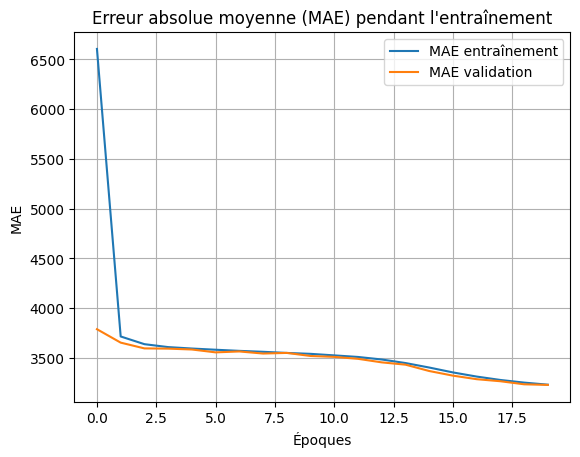

In [ ]:
# Étape 1 : Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import files

# Étape 2 : Importation du fichier CSV depuis ton appareil
uploaded = files.upload()

# Étape 3 : Chargement du fichier
try:
    data = pd.read_csv('Clean_Dataset.csv', encoding='utf-8')
except Exception as e:
    print("Erreur lors du chargement du CSV :", e)
    exit()

# Afficher les colonnes pour vérifier
print("Colonnes disponibles dans le dataset :", data.columns)

# Étape 4 : Prétraitement de base
# Supprimer les colonnes inutiles
data = data.drop(['Unnamed: 0', 'flight'], axis=1, errors='ignore')  # 'flight' est un identifiant, non pertinent

# Gérer les valeurs manquantes
data.dropna(inplace=True)

# Définir les colonnes catégorielles à encoder
categorical_columns = ['airline', 'source_city', 'destination_city', 'stops', 'departure_time', 'arrival_time', 'class']

# Vérifier si toutes les colonnes catégorielles existent
missing_columns = [col for col in categorical_columns if col not in data.columns]
if missing_columns:
    print("Colonnes manquantes :", missing_columns)
    print("Vérifiez les noms des colonnes ou le fichier CSV.")
    exit()

# Encodage des variables catégorielles
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Séparation des caractéristiques et de la cible
try:
    X = data.drop('price', axis=1)  # La cible est 'price' (minuscule)
    y = data['price']
except KeyError as e:
    print("Erreur : La colonne 'price' n'existe pas. Vérifiez les colonnes :", data.columns)
    exit()

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division en ensemble d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Étape 5 : Création du modèle
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Sortie unique pour la régression

# Étape 6 : Compilation du modèle
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Étape 7 : Entraînement du modèle
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Étape 8 : Évaluation du modèle
loss, mae = model.evaluate(x_test, y_test, verbose=2)
print("Erreur absolue moyenne (MAE) sur le test :", mae)

# Étape 9 : Prédiction sur un échantillon
sample = np.expand_dims(x_test[0], axis=0)
prediction = model.predict(sample)
print("Valeur réelle :", y_test.iloc[0], "| Prédiction :", prediction[0][0])

# Étape 10 : Visualisation de l’apprentissage
plt.plot(history.history['mae'], label='MAE entraînement')
plt.plot(history.history['val_mae'], label='MAE validation')
plt.xlabel('Époques')
plt.ylabel('MAE')
plt.title("Erreur absolue moyenne (MAE) pendant l'entraînement")
plt.legend()
plt.grid(True)
plt.show()
